In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.01]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

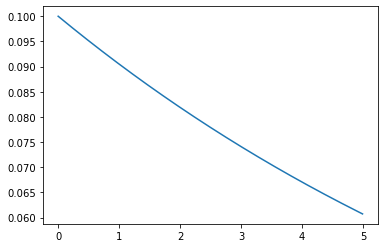

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 5, 0.01)

In [4]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

In [5]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121 

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

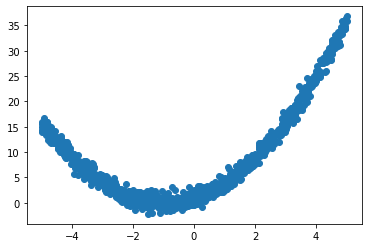

In [7]:
draw_data(data)

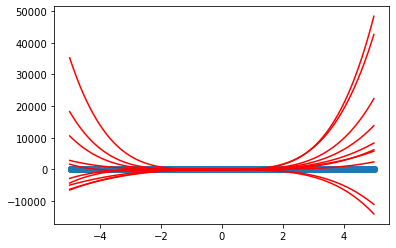

In [8]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for mld in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.show()
   
draw_estimates(10, data)

In [9]:
def update(data):
    print(len(data))
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
    
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

5


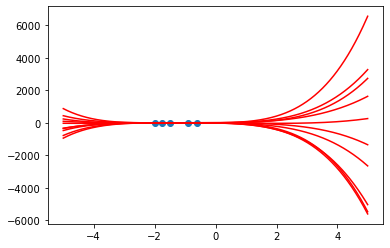

In [10]:
update(data[:5])
draw_estimates(10, data[:5])

10


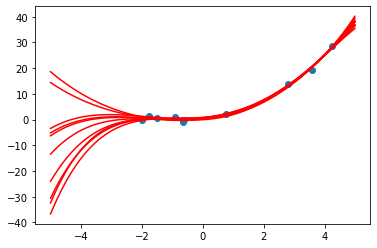

In [11]:
update(data[:10])
draw_estimates(10, data[:10])

50


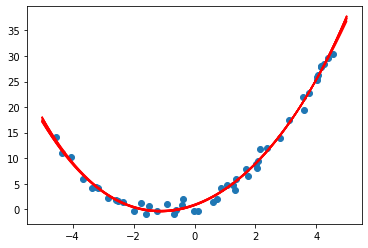

In [12]:
update(data[:50])
draw_estimates(10, data[:50])

In [13]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ -6.07490968],
        [-17.13660727],
        [-16.11263195],
        [ -7.61320895],
        [ -1.55052475]]),
 array([[ 0.54974352],
        [ 1.1378046 ],
        [ 0.90057412],
        [ 0.1361879 ],
        [-0.01205329]]),
 array([[ 0.81851556],
        [ 2.16979641],
        [ 0.93727957],
        [-0.00755308],
        [ 0.00539842]])]

In [14]:
a

[1, 3.5, 6.0, 26.0]

In [15]:
b

[0.1, 0.43944159106767244, 3.0911007211205743, 19.772178189877742]

In [16]:
1/np.sqrt(lmd)

array([0.36499628])

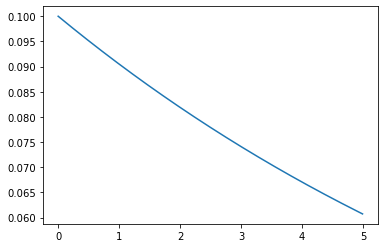

In [17]:
draw(lambda_dist, 0, 5, 0.01)

In [18]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + 2*x + 1.0 + np.random.randn()
    
    data.append([x,y])
    
data

[[1.1540726370020749, 4.007939585367134],
 [-0.6269466848172722, 0.4756808339256258],
 [3.6522748609770197, 23.022633688333507],
 [2.3054411689674845, 11.174928939720177],
 [-0.9795090115406901, 1.5230929686768595],
 [4.414251267278283, 29.175457615840703],
 [3.3440540657378826, 20.595961099859295],
 [4.082968187243889, 25.916372409553723],
 [2.185041838424776, 10.394099861405868],
 [1.312475043689837, 4.260624960385428],
 [-4.390512329711772, 10.055071219081118],
 [-0.3737452509560901, -0.30968494467812757],
 [4.714702048153006, 32.80598747946502],
 [-0.3696912733315594, 1.8294795286579721],
 [-1.03112729611187, 0.2665730102055591],
 [-3.3594560800833007, 5.612203937727004],
 [2.222788958360782, 10.595073419606587],
 [-4.433755432318305, 11.962218529163339],
 [-1.1334216596288726, 0.27468991176919905],
 [-2.418264626040364, 2.6282180515277624],
 [-0.5116644190875441, 0.5094114646377739],
 [0.6403401757902016, 2.2071003049926015],
 [3.4233556844535395, 17.150983150133683],
 [-2.7574474